<a href="https://colab.research.google.com/github/JosePabloGFnl/Vision-Computacional/blob/main/Ejercicio%207/Ejercicio7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

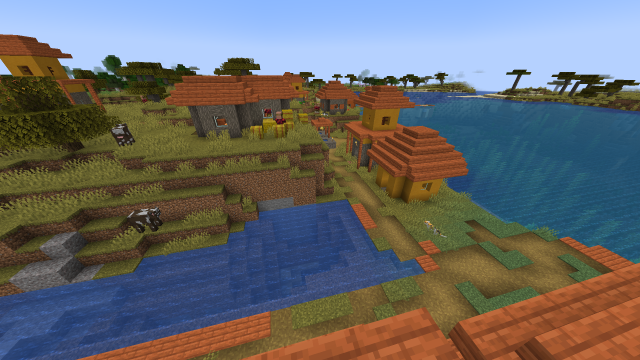

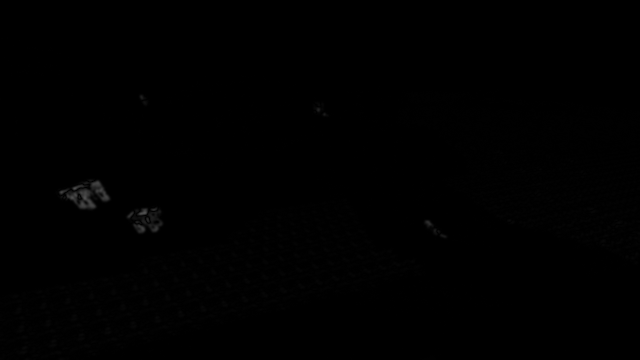

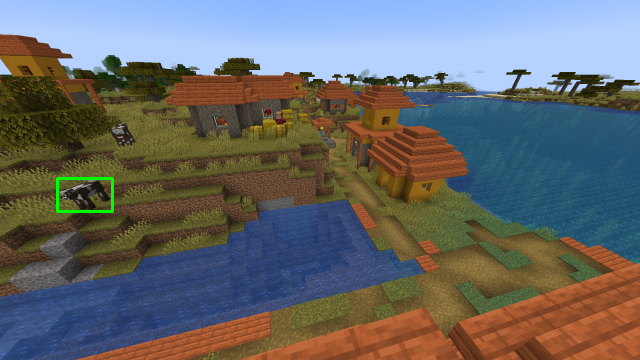

In [1]:
# Se importan librerias
import numpy as np
from google.colab.patches import cv2_imshow as imshow  #  Para mostrar imágenes
import cv2  #  OpenCV

# Nombre de archivos
filename_a = "img_a.png"
filename_b = "img_b.png"

# Se inicializan las imágenes
img_a_og = cv2.imread( filename_a )  #  Imágenes originales
img_b_og = cv2.imread( filename_b )  #  Imágenes originales

# Se tornan las imágenes a gris
img_a = cv2.cvtColor( img_a_og, cv2.COLOR_BGR2GRAY )
img_b = cv2.cvtColor( img_b_og, cv2.COLOR_BGR2GRAY )

# Se difuminan las imágenes para facilitar el procesamiento
img_a = cv2.GaussianBlur( img_a, (5, 5), 0 )
img_b = cv2.GaussianBlur( img_b, (5, 5), 0 )

# Se obtiene la diferencia entre ambas imágenes
img_delta = cv2.absdiff( img_a, img_b )

# Se convirte la diferencia en binarios
ret, thresh = cv2.threshold( img_delta, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU )

# Se dilata la imagen umbral para rellenar vacíos
thresh = cv2.dilate(thresh, None, iterations=2)

# Se dibujará una caja en el objeto que se movió
contours, hierarchy = cv2.findContours( thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE )  #  Se encuentran contornos
areas = [cv2.contourArea(c) for c in contours]  #  Se busca el indice del mayor contorno
max_index = np.argmax(areas)
cnt = contours[max_index]
x, y, w, h = cv2.boundingRect(cnt)  #  Se dibuja una caja alrededor del objeto
cv2.rectangle( img_b_og, (x,y), (x+w, y+h), (0, 255, 0), 2 )

# Se muestran las imágenes
imshow(img_a_og)
imshow(img_delta)
imshow(img_b_og)